In [1]:
from mdagent import MDAgent
import os 

In [2]:
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_9_descriptive = get_prompt("descriptive", 9)
prompt_9_natural = get_prompt("natural", 9)

prompt_9_descriptive, prompt_9_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Find any known binding or active sites. 4. Simulate for 1ps at 300 K. 5. Compute the RMSD. 6. Compute the radius of gyration over time. 7. Compute the SASA (solvent accessible surface area). 8. Simulate for 1ps at 400K. 9. Compute the RMSD of the 400K simulation.',
 'Simulate 1LYZ for 1ps at 300 K and for 1ps at 400K. Report the secondary structure assignments of the downloaded PDB structure and any known binding or active sites. Compute SASA and radius of gyration of the 300K simulation. Compute RMSD of both simulations.')

In [3]:
llm_model = "accounts/fireworks/models/llama-v3p1-405b-instruct"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_9_descriptive)

Thought: First, I need to download the PDB file 1LYZ.
Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Next, I need to report the secondary structure assignments of the downloaded PDB structure.

Action:
```
{
  "action": "ComputeDSSP",
  "action_input": {
    "traj_file": "1LYZ_104752",
    "top_file": "1LYZ_104752",
    "target_frames": "first"
  }
}
```Next, I need to find any known binding or active sites.

Action:
```
{
  "action": "GetBindingSites",
  "action_input": {
    "query": "1LYZ",
    "primary_accession": "P00720"
  }
}
```
The primary accession number provided does not match any entry in the data, using the first entry instead.
Next, I need to simulate for 1ps at 300 K.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_104752",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_104752: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_104752
 rec0_104754: dssp values for trajectory with id: 1LYZ_104752
 1LYZ_104802: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_104806: Initial positions for simulation sim0_104806
 sim0_104806: Basic Simulation of Protein 1LYZ_104802
 rec0_104806: Simulation trajectory for protein 1LYZ_104802 and simulation sim0_104806
 rec1_104806: Simulation state log for protein 1LYZ_104802 and simulation sim0_104806
 rec2_104806: Simulation pdb frames for protein 1LYZ_104802 and simulation sim0_104806
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_104817: RMSD plot for 1LYZ
 rgy_rec0_104806: Radii of gyration per frame for rec0_104806
 fig0_104819: Plot of radii of gyration over time for rec0_104806
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_104821: Plot of SASA over time for 1LYZ
 top_sim0_104

In [27]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_104752"))

In [28]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_104752", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [29]:
# make sure the sites were found
from mdagent.tools.base_tools import GetBindingSites

get_known_sites = GetBindingSites()
get_known_sites._run(query="1LYZ", primary_accession="P00720")

The primary accession number provided does not match any entry in the data, using the first entry instead.


'[]'

In [30]:
# make sure trajectory and topology exist (sim1)
traj_path_1_1 = registry_1.get_mapped_path("rec0_104806")
top_path_1_1 = registry_1.get_mapped_path("top_sim0_104806")

assert os.path.exists(traj_path_1_1)
assert os.path.exists(top_path_1_1)

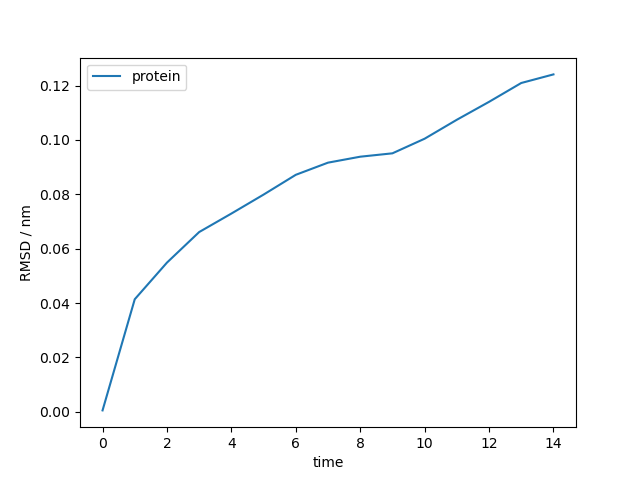

In [31]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_104817'))

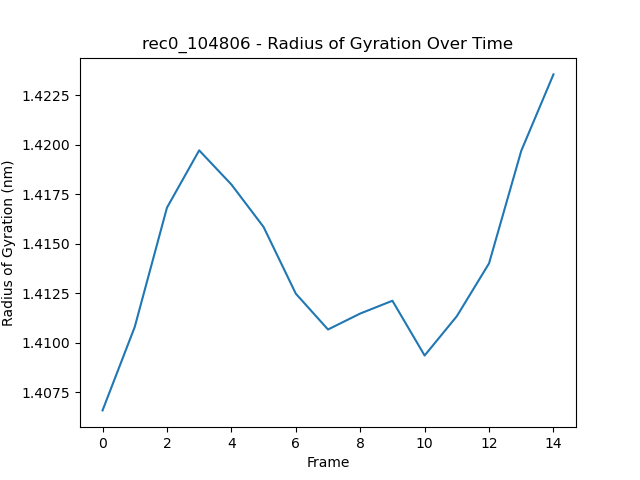

In [32]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_104819'))

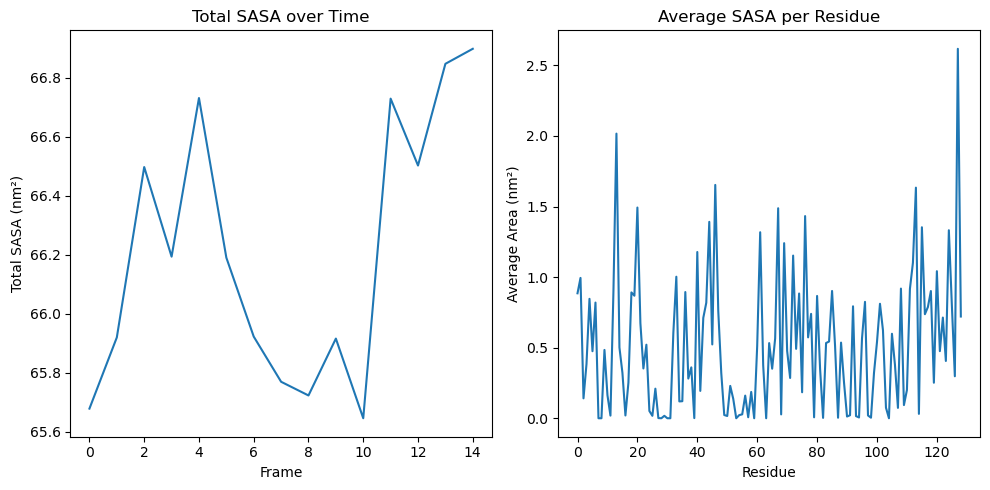

In [33]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_104821'))

In [34]:
# make sure trajectory and topology exist (sim2)
traj_path_1_2 = registry_1.get_mapped_path("rec0_104825")
top_path_1_2 = registry_1.get_mapped_path("top_sim0_104825")

assert os.path.exists(traj_path_1_2)
assert os.path.exists(top_path_1_2)

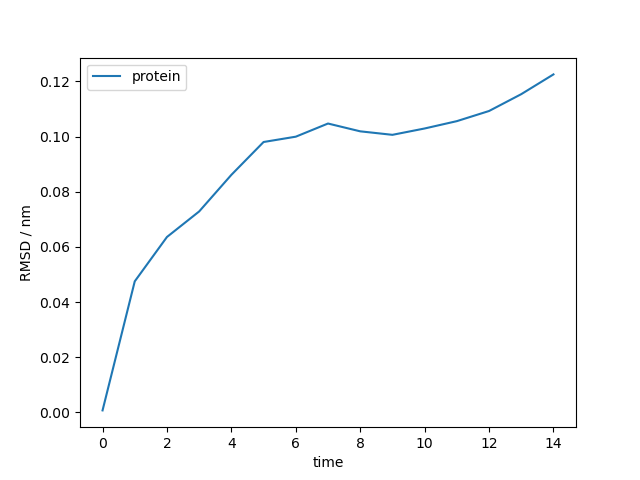

In [35]:
# make sure rmsd plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_104834'))

In [15]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_9_natural)

Thought: First, I need to download the PDB file for 1LYZ. Then, I can simulate it at 300K and 400K for 1ps each. After that, I can compute the secondary structure assignments, SASA, radius of gyration, and RMSD.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": "1LYZ"
}
```
PDB file found with this ID: 1LYZ
Thought: Now that I have the PDB file, I can simulate it at 300K and 400K for 1ps each using the SetUpandRunFunction tool.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1LYZ_104841",
    "forcefield_files": ["amber99sbildn.xml"],
    "save": true,
    "system_params": {
      "nonbondedMethod": "NoCutoff",
      "constraints": "None",
      "rigidWater": false
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [16]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_104841: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_104841
 1LYZ_104849: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_104855: Initial positions for simulation sim0_104855
 sim0_104855: Basic Simulation of Protein 1LYZ_104849
 rec0_104855: Simulation trajectory for protein 1LYZ_104849 and simulation sim0_104855
 rec1_104855: Simulation state log for protein 1LYZ_104849 and simulation sim0_104855
 rec2_104855: Simulation pdb frames for protein 1LYZ_104849 and simulation sim0_104855
 top_sim0_104919: Initial positions for simulation sim0_104919
 sim0_104919: Basic Simulation of Protein 1LYZ_104849
 rec0_104919: Simulation trajectory for protein 1LYZ_104849 and simulation sim0_104919
 rec1_104919: Simulation state log for protein 1LYZ_104849 and simulation sim0_104919
 rec2_104919: Simulation pdb frames for protein 1LYZ_1048

In [17]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_104841"))

In [36]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_104841", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [42]:
# make sure the sites were found
from mdagent.tools.base_tools import GetPDB3DInfo, GetPDBProcessingInfo

get_3d_info = GetPDB3DInfo()
get_processing_info = GetPDBProcessingInfo()
print(get_3d_info._run(query="1LYZ", primary_accession=""))
print(get_processing_info._run(query="1LYZ", processing_type="binding", primary_accession=""))
print(get_processing_info._run(query="1LYZ", processing_type="active site", primary_accession=""))
print(get_processing_info._run(query="1LYZ", processing_type="modified residue", primary_accession=""))

[]
Invalid PTM/Processing key, please use one of the following: 'chain', 'crosslink', 'disulfide bond', 'glycosylation', 'initiator methionine', 'lipidation', 'modified residue', 'peptide', 'propeptide', 'signal peptide', 'transit peptide'.
Invalid PTM/Processing key, please use one of the following: 'chain', 'crosslink', 'disulfide bond', 'glycosylation', 'initiator methionine', 'lipidation', 'modified residue', 'peptide', 'propeptide', 'signal peptide', 'transit peptide'.
[]


In [44]:
# make sure trajectory and topology exist (sim1)
traj_path_2_1 = registry_2.get_mapped_path("rec0_104855")
top_path_2_1 = registry_2.get_mapped_path("top_sim0_104855")

assert os.path.exists(traj_path_2_1)
assert os.path.exists(top_path_2_1)

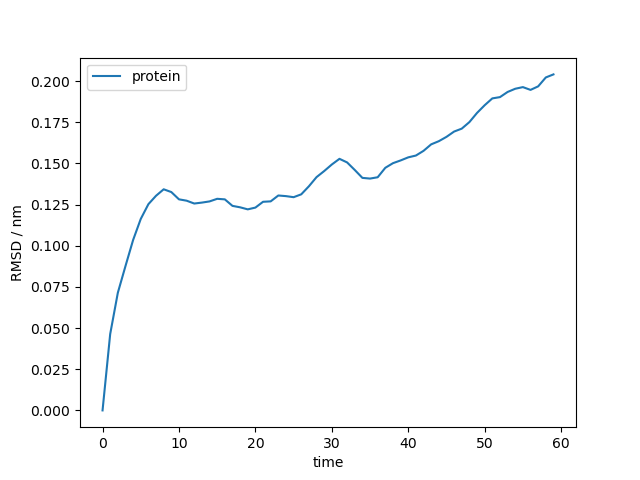

In [45]:
# make sure rmsd plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_104953'))

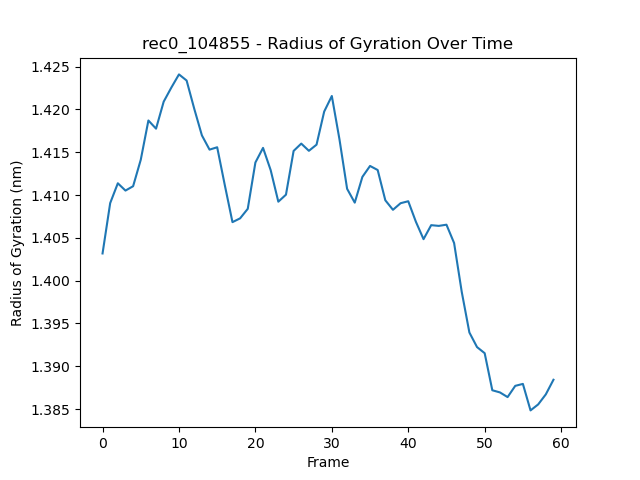

In [46]:
# make sure rgy plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_104949'))

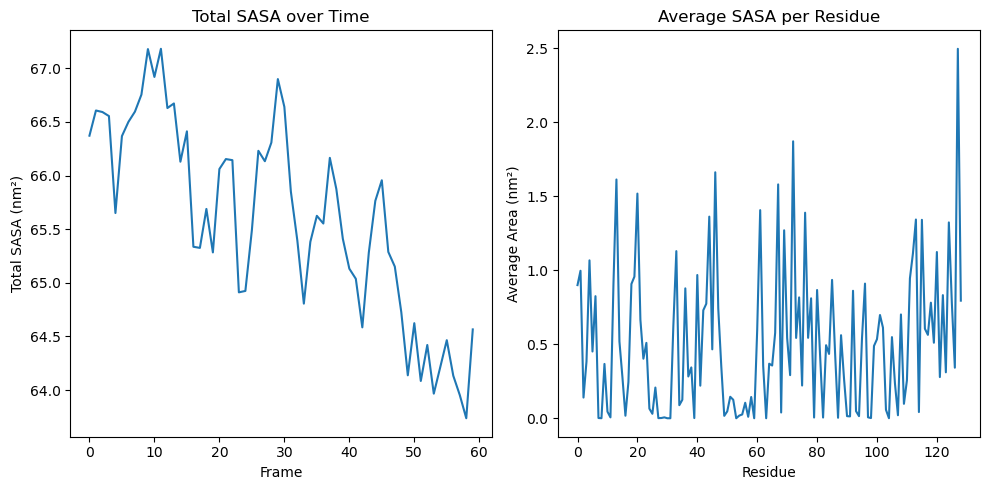

In [47]:
# make sure sasa plot was generated (sim1)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_104946'))

In [48]:
# make sure trajectory and topology exist (sim2)
traj_path_2_2 = registry_2.get_mapped_path("rec0_104919")
top_path_2_2 = registry_2.get_mapped_path("top_sim0_104919")

assert os.path.exists(traj_path_2_2)
assert os.path.exists(top_path_2_2)

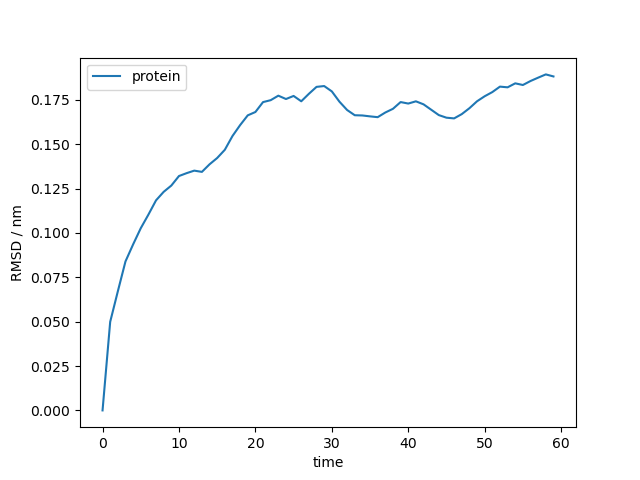

In [49]:
# make sure rmsd plot was generated (sim2)
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_104958'))